# Image Manipulation in Python

In [1]:
import sys
print(sys.version)

3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


Imports

In [2]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data

In [3]:
! curl -O https://www.rmiguides.com/about/_images/p_arnot.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45804  100 45804    0     0  93183      0 --:--:-- --:--:-- --:--:-- 93097


In [4]:
! ls

Numpy_Image.ipynb  p_arnot.jpg	p_arnot.npy  Untitled.ipynb


Read

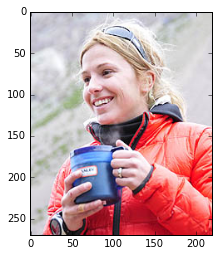

In [5]:
# Read with matplotlib and display image
img = plt.imread('p_arnot.jpg')
plt.imshow(img)

In [6]:
# It should be width x height x number of channels
img.shape

(270, 220, 3)

Can do some numpy operations now.  But let's instead equalize the image or spread out the distribution to be even for all pixel intensity values also know as equalizing the image histogram.

Equalize

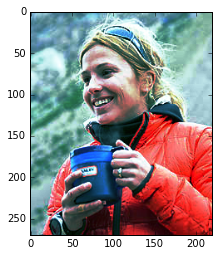

In [7]:
# Convert the numpy array to PIL package format to use it's function
img_pil = Image.fromarray(np.uint8(img))
img_pil = ImageOps.equalize(img_pil)
plt.imshow(img_pil)


# Could also crop, refit to a certain image size, flip and rotate (useful for image augmentation)

Convert back to `numpy`

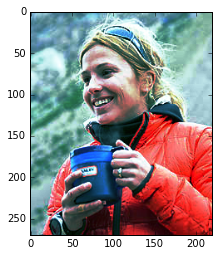

In [8]:
# Back to numpy array
img2 = np.asarray(img_pil)
plt.imshow(img2)

Histogram data exploration

(array([  7018.,  10912.,   7227.,   6446.,   8096.,   8981.,  13594.,
         29417.,  58632.,  27877.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

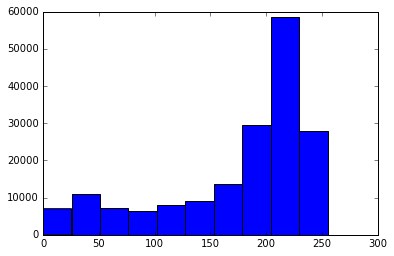

In [9]:
plt.hist(img.ravel())

(array([ 17260.,  16848.,  17567.,  17099.,  17414.,  17297.,  18052.,
         17082.,  15835.,  23746.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

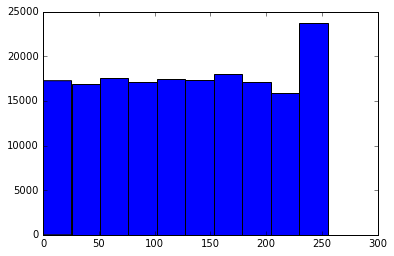

In [10]:
plt.hist(img2.ravel())

Save

In [11]:
# save as numpy binary file - it adds extension .npy 
# (it's fast i/o)
np.save('p_arnot', img2)

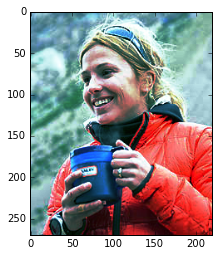

In [12]:
img2 = np.load('p_arnot.npy')
plt.imshow(img2)

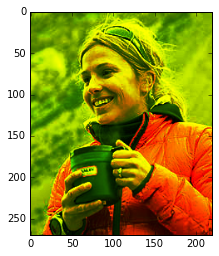

In [13]:
# A few more things in numpy

# Remove the Blue channel, channel 1
imgmod = img2.copy()
imgmod[:,:,2] = 0
plt.imshow(imgmod)

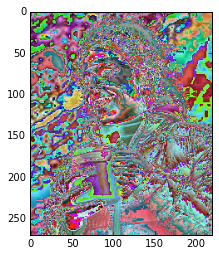

In [14]:
# Subtract the mean and divide by the std dev from all values
imgmod2 = img2.copy()
meanval = np.mean(img2.ravel())
stdval = np.std(img2.ravel())
imgmod2 = (imgmod2 - meanval) / stdval
plt.imshow(imgmod2)

# Now try doing this per channel instead or over multiple images 
# (where you'd standardize per pixel accross images rather than 
# on all pixels of one image or within an image)

In [15]:
print(img.shape)
print(min(img.ravel()))
print(max(img.ravel()))

(270, 220, 3)
0
255


In [16]:
img_test = img.copy()
img_test[img[:] < 30] = 10

10

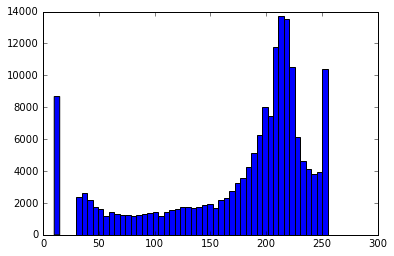

In [17]:
plt.hist(img_test.ravel(), bins=50)
min(img_test.ravel())

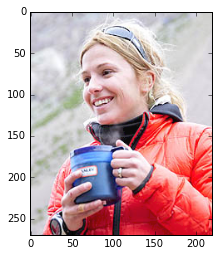

In [18]:
plt.imshow(img_test)